In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/magnus-engstroem/IE500-Data-Mining/refs/heads/main/Selected_data/train.csv"
url_test = "https://raw.githubusercontent.com/magnus-engstroem/IE500-Data-Mining/refs/heads/main/Selected_data/test.csv"
try:
    df = pd.read_csv(url)
    #print(df.head())
    df_test = pd.read_csv(url_test)

except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")
    print("Bitte prüfe, ob die URL korrekt ist und die Datei existiert.")

In [2]:
y = df['is_benign']
X = df.drop('is_benign', axis=1)

y_test = df_test['is_benign']
X_test = df_test.drop('is_benign', axis=1)


In [3]:
print("\nVerteilung im gesamten DataFrame (df):")
print(df['is_benign'].value_counts())


Verteilung im gesamten DataFrame (df):
is_benign
0    150704
1     10758
Name: count, dtype: int64


In [4]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


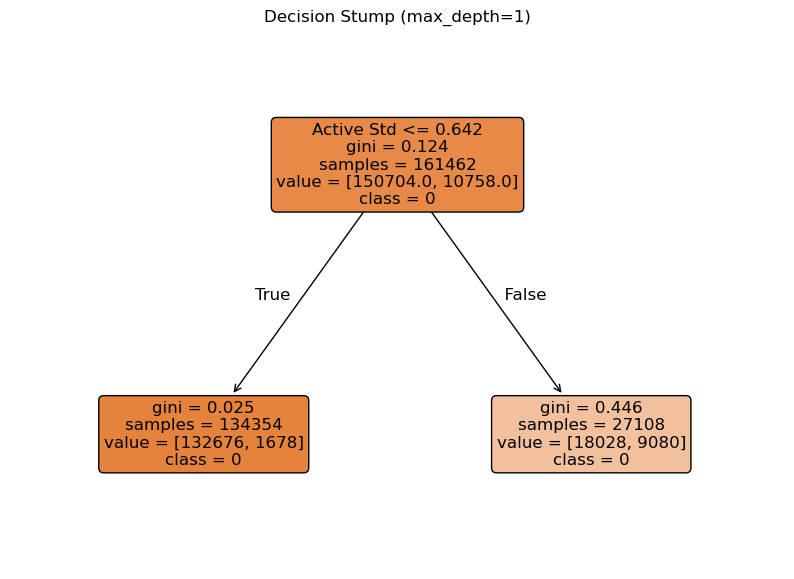

In [5]:
feature_names = X.columns.tolist()
class_names = [str(c) for c in stump.classes_] # z.B. ['0' (nicht gutartig), '1' (gutartig)]

plt.figure(figsize=(10, 7))
plot_tree(
    stump, 
    filled=True, 
    rounded=True,
    feature_names=feature_names,
    class_names=class_names,
    fontsize=12
)
plt.title("Decision Stump (max_depth=1)")
plt.show()

In [6]:
stump_balanced = DecisionTreeClassifier(max_depth=1, random_state=42, class_weight='balanced')
stump_balanced.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


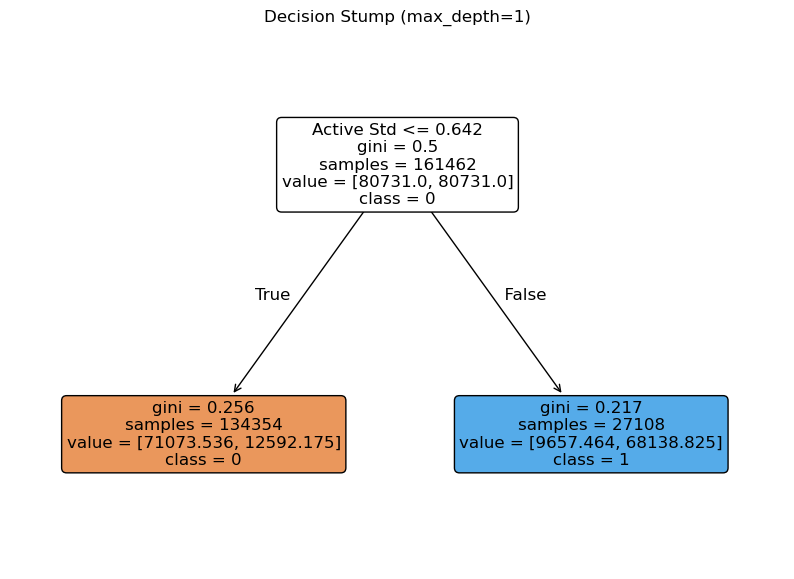

In [7]:
plt.figure(figsize=(10, 7))
plot_tree(
    stump_balanced, 
    filled=True, 
    rounded=True,
    feature_names=feature_names,
    class_names=class_names,
    fontsize=12
)
plt.title("Decision Stump (max_depth=1)")
plt.show()

In [8]:
from sklearn.metrics import classification_report

y_pred = stump_balanced.predict(X_test)
target_names = ['Klasse 0 (Nicht Gutartig)', 'Klasse 1 (Gutartig)']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

                           precision    recall  f1-score   support

Klasse 0 (Nicht Gutartig)       0.99      0.88      0.93     37624
      Klasse 1 (Gutartig)       0.33      0.84      0.48      2742

                 accuracy                           0.88     40366
                macro avg       0.66      0.86      0.70     40366
             weighted avg       0.94      0.88      0.90     40366



In [9]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy="constant", constant=0)
dummy_model.fit(X, y)

y_pred_dummy = dummy_model.predict(X_test)

In [10]:
print("--- 1. Report: Dein Decision Stump (max_depth=1) ---")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\n" + "="*50 + "\n")

print("--- 2. Report: Dummy-Modell (sagt immer 0) ---")
print(classification_report(y_test, y_pred_dummy, target_names=target_names))

--- 1. Report: Dein Decision Stump (max_depth=1) ---
                           precision    recall  f1-score   support

Klasse 0 (Nicht Gutartig)       0.99      0.88      0.93     37624
      Klasse 1 (Gutartig)       0.33      0.84      0.48      2742

                 accuracy                           0.88     40366
                macro avg       0.66      0.86      0.70     40366
             weighted avg       0.94      0.88      0.90     40366



--- 2. Report: Dummy-Modell (sagt immer 0) ---
                           precision    recall  f1-score   support

Klasse 0 (Nicht Gutartig)       0.93      1.00      0.96     37624
      Klasse 1 (Gutartig)       0.00      0.00      0.00      2742

                 accuracy                           0.93     40366
                macro avg       0.47      0.50      0.48     40366
             weighted avg       0.87      0.93      0.90     40366



C:\Users\mstei\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mstei\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mstei\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
